<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


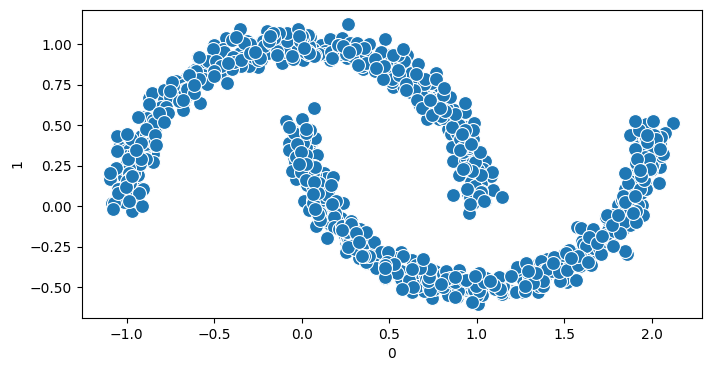

In [25]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

n_samples = 1000
np.random.seed(3)
X, y = make_moons(n_samples=n_samples, noise=.05)
df = pd.DataFrame(X)

plt.figure(figsize = (8, 4))
sns.scatterplot(x=df[0], y=df[1], s=100)

df.info()

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='0', ylabel='1'>

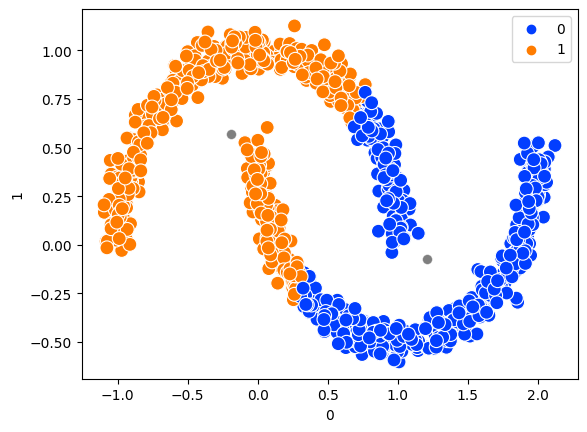

In [26]:
from sklearn.cluster import KMeans, dbscan

model = KMeans(n_clusters=2, random_state=123)
model.fit(df)

df['label'] = model.predict(df)
center = model.cluster_centers_

sns.scatterplot(x=df[0], y=df[1], hue=df['label'], s=100, palette='bright')
sns.scatterplot(x=center[:,0], y=center[:,1], s=50, alpha=0.5, color='black')

In [27]:
df.drop(columns=['label'], axis=1, inplace=True)

<Axes: xlabel='0', ylabel='1'>

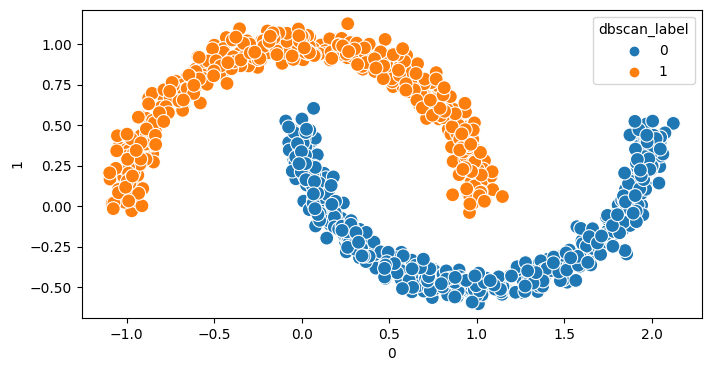

In [28]:
from sklearn.cluster import DBSCAN # 기하학적인 데이터에 잘어울림

eps = 0.1 # 반경
min_samples = 5 # 최소 데이터 갯수

model = DBSCAN(eps=eps, min_samples=min_samples)
model.fit(df)
df['dbscan_label'] = model.labels_

plt.figure(figsize=(8,4))
sns.scatterplot(x=df[0], y=df[1], hue=df['dbscan_label'], s=100)

<Axes: xlabel='0', ylabel='1'>

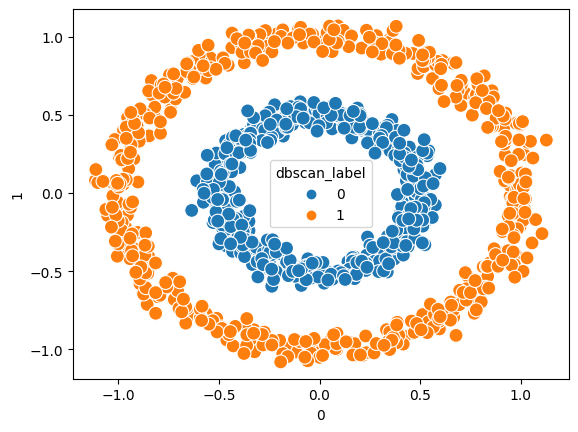

In [31]:
from sklearn.datasets import make_circles


X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
df = pd.DataFrame(X)

eps = 0.1
min_samples = 5

model = DBSCAN(eps=eps, min_samples=min_samples)
model.fit(df)

df['dbscan_label'] = model.labels_

sns.scatterplot(x=df[0], y=df[1], hue=df['dbscan_label'], s=100)